## Case study 2 -- Collinearity

In [29]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from statsmodels.graphics.regressionplots import abline_plot

In [66]:
# right shoe sizes from 3 to 10
#RSS = range(3, 11)

# left shoe sizes from 3 to 10 +
# normally distributed deviates with sd = 0.1 
#LSS = [3.09,3.95,4.95,6.22,6.82,8.11,8.99,9.95]

# 120 + RSS value + normally distributed deviates with sd=10
#weights = [154,148.2,162.3,179.3,201,206.6,200.75,223.6]

df = pd.read_csv('data/shoes.csv')

In [67]:
df.head(10)

,Timestamp,LSS,RSS,weight
0,6/28/18 15:02,10.0,10.0,67.0
1,6/28/18 15:02,11.5,11.5,72.5
2,6/28/18 15:02,10.5,10.5,70.0
3,6/28/18 15:03,8.5,8.5,66.0
4,6/28/18 15:03,9.5,9.5,71.0
5,6/28/18 15:03,10.0,10.0,71.0
6,6/28/18 15:03,9.5,9.5,65.0
7,6/28/18 15:03,8.5,9.0,72.0
8,6/28/18 15:03,8.5,8.5,66.0
9,6/28/18 15:03,9.5,9.5,68.0


[3, 13, 50, 80]

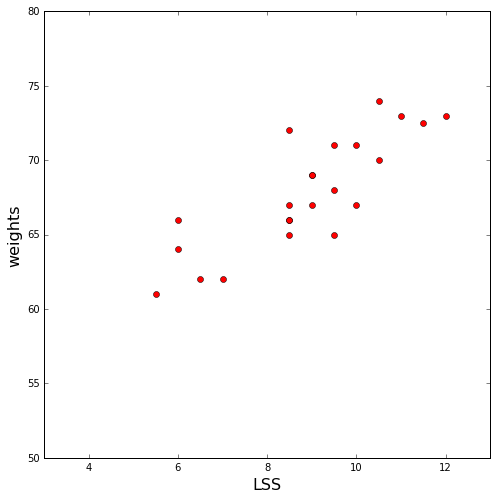

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

width = 8
height = 8
plt.figure(figsize=(width, height))

plt.plot(df['LSS'], df['weight'], 'ro')

plt.xlabel('LSS', fontsize=16)
plt.ylabel('weights', fontsize=16)

plt.axis([3, 13, 50, 80])

In [61]:
m = smf.ols(formula='weights ~ LSS + RSS', data=df).fit()

In [62]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                weights   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     27.01
Date:                Thu, 28 Jun 2018   Prob (F-statistic):            0.00209
Time:                        09:50:15   Log-Likelihood:                -27.478
No. Observations:                   8   AIC:                             60.96
Df Residuals:                       5   BIC:                             61.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.3815     10.272     11.135      0.0

In [57]:
m = smf.ols(formula='weight ~ LSS', data=df).fit()

In [58]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                weights   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     63.39
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           0.000209
Time:                        09:48:11   Log-Likelihood:                -27.560
No. Observations:                   8   AIC:                             59.12
Df Residuals:                       6   BIC:                             59.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.9324      9.385     12.140      0.0

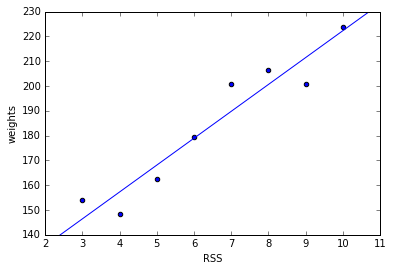

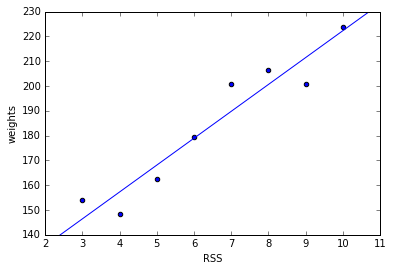

In [59]:
ax = df.plot(x='RSS', y='weights', kind='scatter')

# plot regression line
abline_plot(model_results=m, ax=ax)

In [ ]:
# Collinearity
# R code

RSS = 3:10 #Right shoe size
LSS = rnorm(RSS, RSS, 0.1) #Left shoe size - similar to RSS
cor(LSS, RSS) #correlation ~ 0.99

weights = 120 + rnorm(RSS, 10*RSS, 10)

##Fit a joint model
m = lm(weights ~ LSS + RSS)


##F-value is very small, but neither LSS or RSS are significant
summary(m)

##Fitting RSS or LSS separately gives a significant result. 
summary(lm(weights ~ LSS))